In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Merging all data into a single CSV file

In [4]:
df = pd.DataFrame()
files = [file for file in os.listdir('./Sales_Data')]

for file in files:
    tmp_df = pd.read_csv('./Sales_Data/'+file)
    df = pd.concat([df, tmp_df])

df.to_csv('all_data.csv', index=False)

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


# Cleaning data

Delete NaN rows

In [5]:
df = df.dropna(how='all')

Delete text data form date colum

In [6]:
df = df[df['Order Date'].str[0:2] != 'Or']

Convert Quantity Ordered and Price Each to int

In [12]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])

# Task 1: Find profit per month

Add month colum v1

In [7]:
# df['Month'] = df['Order Date'].str[0:2]
# df['Month'] = df['Month'].astype('int32')

Convert Order Date to datetime

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

Add month colum v2

In [10]:
df['Month'] = pd.DatetimeIndex(df['Order Date']).month

Add a sales colum

In [13]:
df['Sales'] = df['Quantity Ordered'] * df['Price Each']

Result

In [22]:
results = df.groupby('Month').sum(numeric_only=True)

Text(0.5, 0, 'Month number')

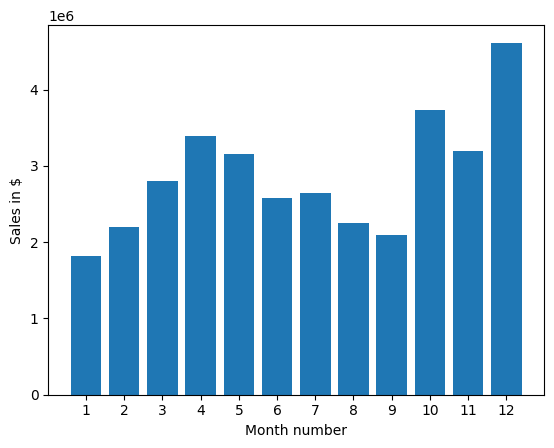

In [26]:
months = range(1, 13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in $')
plt.xlabel('Month number')

# Task 2: What city had the highest number of sales

Create City colum

In [31]:
def get_city(Address):
    return Address.split(',')[1]

def get_state(Address):
    return Address.split(',')[2][1:3]

df['City'] = df['Purchase Address'].apply(lambda x: f'{get_city(x)} ({get_state(x)})')

df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


Result

In [35]:
results = df.groupby('City').sum(numeric_only=True)
results[['Quantity Ordered', 'Sales']]

,Quantity Ordered,Sales
City,,
Atlanta (GA),16602,2795498.58
Austin (TX),11153,1819581.75
Boston (MA),22528,3661642.01
Dallas (TX),16730,2767975.40
Los Angeles (CA),33289,5452570.80
New York City (NY),27932,4664317.43
Portland (ME),2750,449758.27
Portland (OR),11303,1870732.34
San Francisco (CA),50239,8262203.91


Text(0.5, 0, 'City name')

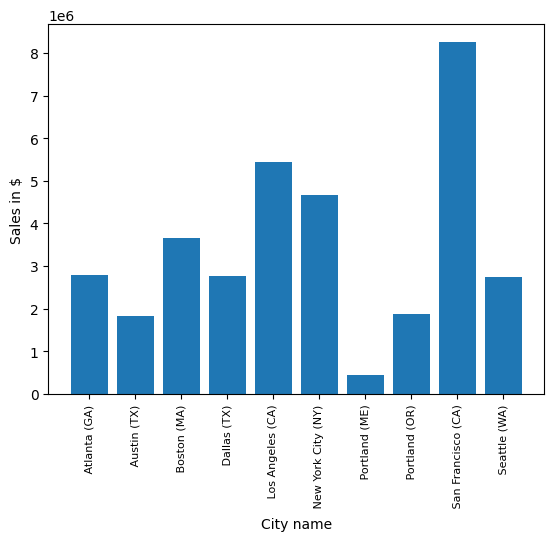

In [43]:
cities = [city for city, tmp_df in df.groupby('City')]

plt.bar(cities, results['Sales'])
plt.xticks(cities, rotation='vertical', size=8)
plt.ylabel('Sales in $')
plt.xlabel('City name')



# Task 3: What products are most often sold togather?

Create duplicate df

In [45]:
df_dplct = df[df['Order ID'].duplicated(keep=False)]

Create Grouped colum and delete duplicated values

In [50]:
df_dplct['Grouped'] = df_dplct.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df_dplct = df_dplct[['Order ID', 'Grouped']].drop_duplicates()

df_dplct.head()

C:\Users\Andrey\AppData\Local\Temp\ipykernel_4472\710796000.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dplct['Grouped'] = df_dplct.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


Counting pairs

In [51]:
from itertools import combinations
from collections import Counter

In [53]:
count = Counter()

for row in df_dplct['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [54]:
count.most_common(10)

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]

# Task 4: What product sold the most and its price

Find the sales of each product

In [60]:
product_group = df.groupby('Product')
quantity_ordered = product_group.sum(numeric_only=True)['Quantity Ordered']

products = [product for product, tmp_df in product_group]

Results

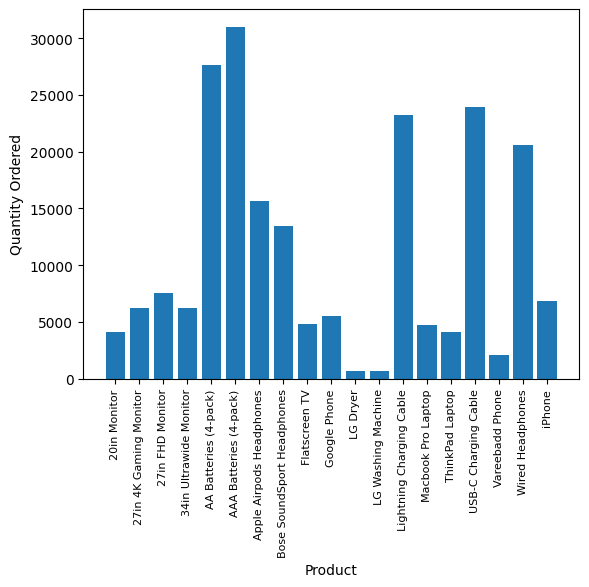

In [65]:
plt.bar(products, quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(rotation='vertical', size=8)
plt.show()

Create price chart

C:\Users\Andrey\AppData\Local\Temp\ipykernel_4472\3163820774.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)


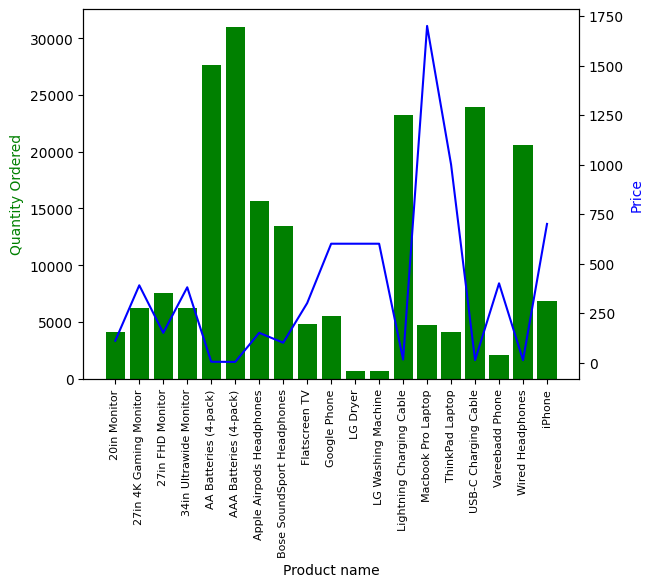

In [74]:
prices = df.groupby('Product').mean(numeric_only=True)['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='g')
ax2.plot(products, prices, 'b-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price', color='b')

ax1.set_xticklabels(products, rotation='vertical', size=8)

plt.show()